In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv("D:\\study\\dai101\\Time-Wasters on Social Media.csv")

In [7]:
data.shape

(1000, 14)

In [8]:
data.head()

,UserID,Age,Gender,Location,Profession,Platform,Total Time Spent,Video Category,Time Spent On Video,Number of Videos Watched,Frequency,Satisfaction,watch reason,Addiction Level
0,1,56,Male,Pakistan,Engineer,Instagram,80.0,Pranks,26,22,Night,7,Procrastination,5
1,2,46,Female,Mexico,Artist,Instagram,228.0,Pranks,25,31,Afternoon,5,Habit,3
2,3,32,Female,United States,Engineer,Facebook,30.0,Vlogs,9,7,Evening,4,Entertainment,2
3,4,60,Male,Barzil,Waiting staff,YouTube,101.0,Vlogs,6,41,Night,7,Habit,5
4,5,25,Male,Pakistan,Manager,TikTok,136.0,Gaming,13,21,Morning,2,Boredom,0


In [9]:
data.tail()

,UserID,Age,Gender,Location,Profession,Platform,Total Time Spent,Video Category,Time Spent On Video,Number of Videos Watched,Frequency,Satisfaction,watch reason,Addiction Level
995,996,22,Male,India,Students,TikTok,144.0,Gaming,17,17,Afternoon,1,Procrastination,0
996,997,40,Female,Pakistan,Waiting staff,Facebook,231.0,Life Hacks,2,17,Night,2,Boredom,0
997,998,27,Male,India,Waiting staff,TikTok,165.0,Pranks,9,28,Night,1,Procrastination,0
998,999,61,Male,Pakistan,Students,YouTube,151.0,Life Hacks,12,30,Night,7,Procrastination,5
999,1000,19,Male,India,driver,YouTube,167.0,Pranks,19,40,Evening,4,Procrastination,2


In [23]:
data.isnull().sum()#there are some null values

UserID                      0
Age                         0
Gender                      0
Location                    0
Profession                  0
Platform                    0
Total Time Spent            3
Video Category              0
Time Spent On Video         0
Number of Videos Watched    0
Frequency                   0
Satisfaction                0
watch reason                0
Addiction Level             0
dtype: int64

In [24]:
data.dropna().isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Profession                  0
Platform                    0
Total Time Spent            0
Video Category              0
Time Spent On Video         0
Number of Videos Watched    0
Frequency                   0
Satisfaction                0
watch reason                0
Addiction Level             0
dtype: int64

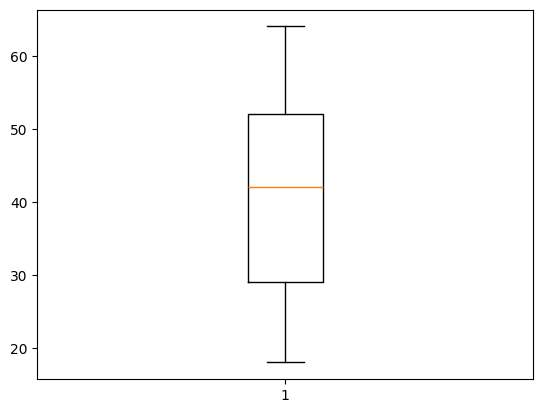

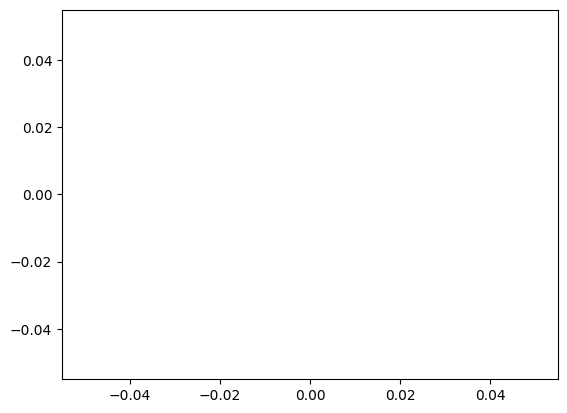

In [12]:
column_name = "Age"
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data[column_name] < (Q1 - 1.5 * IQR)) | (data[column_name] > (Q3 + 1.5 * IQR))]
plt.boxplot(data[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

as we can see no outlier is found

In [13]:
print(data.dtypes)
columns_to_check = ['Total Time Spent', 'Addiction Level','Age']
for column_name in columns_to_check:
    for value in data[column_name]:
        try:
            float(value)
        except ValueError:
            print(f"Column {column_name} contains non-numeric value: {value}")


UserID                        int64
Age                           int64
Gender                       object
Location                     object
Profession                   object
Platform                     object
Total Time Spent            float64
Video Category               object
Time Spent On Video           int64
Number of Videos Watched      int64
Frequency                    object
Satisfaction                  int64
watch reason                 object
Addiction Level               int64
dtype: object


In [14]:
data.duplicated()#no duplicates found 

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Profession                1000 non-null   object 
 5   Platform                  1000 non-null   object 
 6   Total Time Spent          997 non-null    float64
 7   Video Category            1000 non-null   object 
 8   Time Spent On Video       1000 non-null   int64  
 9   Number of Videos Watched  1000 non-null   int64  
 10  Frequency                 1000 non-null   object 
 11  Satisfaction              1000 non-null   int64  
 12  watch reason              1000 non-null   object 
 13  Addiction Level           1000 non-null   int64  
dtypes: float6

In [77]:
data.describe()

,UserID,Age,Total Time Spent,Time Spent On Video,Number of Videos Watched,ProductivityLoss,Satisfaction,Addiction Level
count,1000.000000,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,151.424273,14.973000,25.248000,5.136000,4.864000,2.906000
std,288.819436,13.497852,83.931206,8.200092,14.029159,2.122265,2.122265,2.058495
min,1.000000,18.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,250.750000,29.000000,78.000000,8.000000,14.000000,3.000000,4.000000,2.000000
50%,500.500000,42.000000,152.000000,15.000000,25.000000,5.000000,5.000000,3.000000
75%,750.250000,52.000000,223.000000,22.000000,37.000000,6.000000,7.000000,5.000000
max,1000.000000,64.000000,298.000000,29.000000,49.000000,9.000000,9.000000,7.000000


In [16]:
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)
        

In [20]:
cat#CATEGORICAL DATA

['Gender',
 'Location',
 'Profession',
 'Platform',
 'Video Category',
 'Frequency',
 'Satisfaction',
 'watch reason',
 'Addiction Level']

In [21]:
num#NUMERICAL DATA

['UserID',
 'Age',
 'Total Time Spent',
 'Time Spent On Video',
 'Number of Videos Watched']

# UNIVARIATE ANALYSIS

In [28]:
data['Gender'].value_counts()

Gender
Male      514
Female    322
Other     164
Name: count, dtype: int64

Text(0, 0.5, 'GENDER')

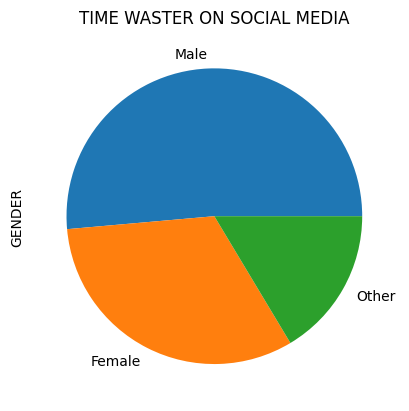

In [30]:
data['Gender'].value_counts().plot(kind = "pie")
plt.title("TIME WASTER ON SOCIAL MEDIA")
plt.ylabel("GENDER")

In [31]:
data['Location'].value_counts()

Location
India            228
United States    174
Vietnam           82
Barzil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: count, dtype: int64

Text(0.5, 1.0, 'TIME WASTERS BY LOCATION')

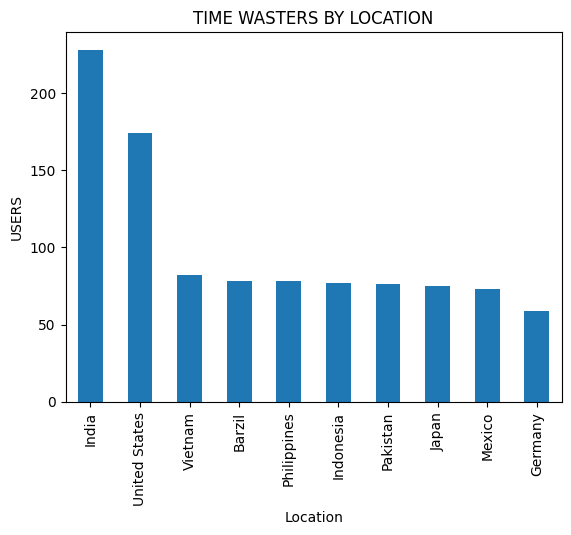

In [43]:
data['Location'].value_counts().plot(kind ="bar")
plt.xlabel("Location")
plt.ylabel("USERS")
plt.title("TIME WASTERS BY LOCATION")

Here we can see india spend more time on social media

In [35]:
data['Profession'].value_counts()

Profession
Students         246
Waiting staff    194
Labor/Worker     186
driver           113
Engineer          65
Cashier           56
Manager           54
Artist            47
Teacher           39
Name: count, dtype: int64

Text(0.5, 1.0, 'TIME WASTERS BY PROFESSION')

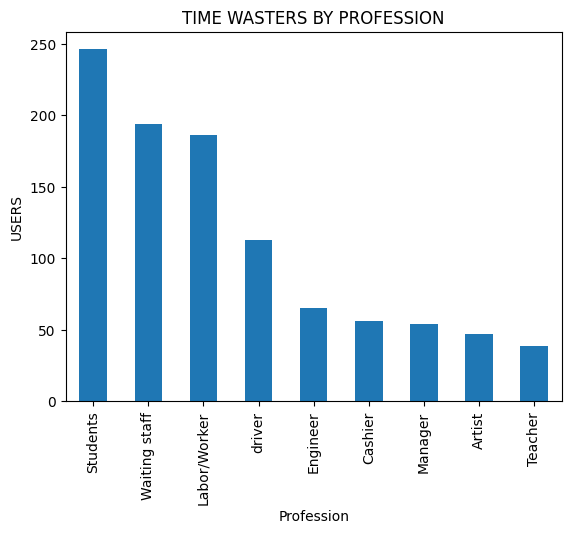

In [44]:
data['Profession'].value_counts().plot(kind ="bar")
plt.xlabel("Profession")
plt.ylabel("USERS")
plt.title("TIME WASTERS BY PROFESSION")

STUDENTS ARE WASTING MORE TIME ON SOCIAL MEDIA

In [40]:
data['Platform'].value_counts()

Platform
TikTok       273
Instagram    256
YouTube      250
Facebook     221
Name: count, dtype: int64

Text(0.5, 1.0, 'TIME WASTERS BY PLATFORM')

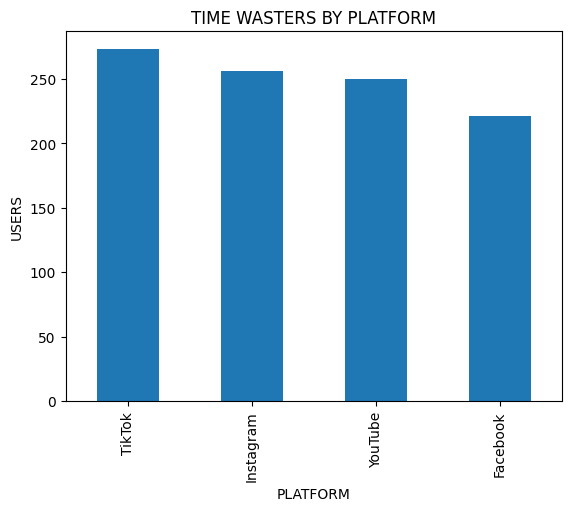

In [45]:
data['Platform'].value_counts().plot(kind ="bar")
plt.xlabel("PLATFORM")
plt.ylabel("USERS")
plt.title("TIME WASTERS BY PLATFORM")

People spend more time on Tiktok

In [42]:
data['Video Category'].value_counts()

Video Category
Jokes/Memes      179
Life Hacks       162
Gaming           119
Vlogs            114
Pranks           110
Entertainment    102
Trends           100
ASMR              79
Comedy            35
Name: count, dtype: int64

Text(0.5, 1.0, 'VIDEOS PEOPLE LIKE TO WATCH')

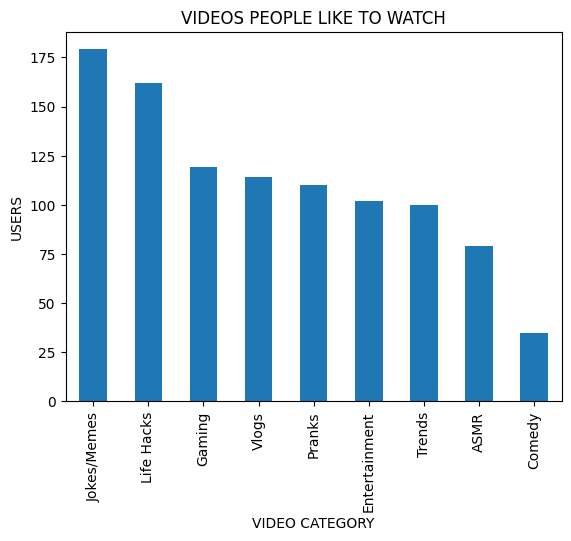

In [46]:
data['Video Category'].value_counts().plot(kind ="bar")
plt.xlabel("VIDEO CATEGORY")
plt.ylabel("USERS")
plt.title("VIDEOS PEOPLE LIKE TO WATCH")

People spend more time in watching memes/jokes

In [51]:
data['Watch Reason'].value_counts()

Watch Reason
Habit              339
Boredom            277
Entertainment      264
Procrastination    120
Name: count, dtype: int64

Text(0.5, 1.0, 'WHY PEOPLE ARE ON MEDIA?')

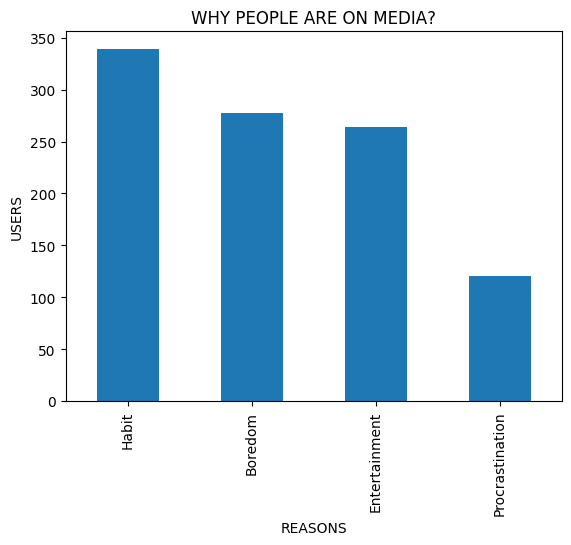

In [50]:
data['Watch Reason'].value_counts().plot(kind ="bar")
plt.xlabel("REASONS")
plt.ylabel("USERS")
plt.title("WHY PEOPLE ARE ON MEDIA?")  

In [ ]:
We can see majority of people have habit to be social media

Text(0.5, 1.0, 'Distribution of Age')

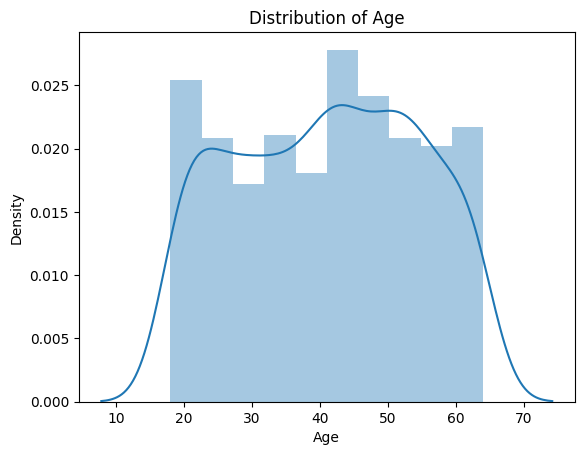

In [61]:
sns.distplot(data['Age'])
plt.title('Distribution of Age')

In [62]:
data['Age'].skew()

np.float64(-0.046883220802412674)

data is left skew i.e higher age people spend more time on social media

Text(0.5, 1.0, 'Distribution of time spent')

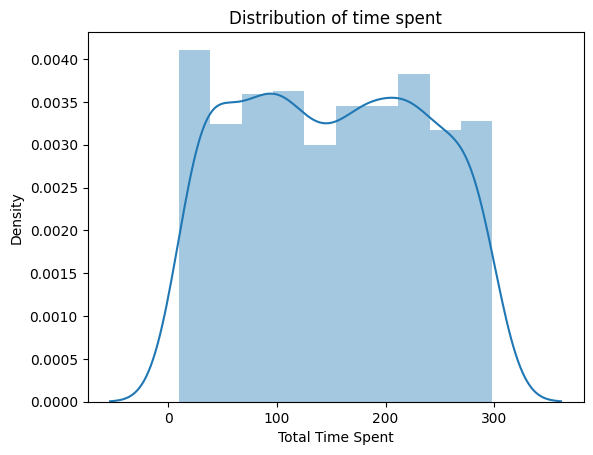

In [65]:
sns.distplot(data['Total Time Spent'])
plt.title('Distribution of time spent')

In [81]:
data['Total Time Spent'].skew()

np.float64(0.03347219802319521)

data is right skew 

Text(0.5, 1.0, 'Distribution of satisfaction')

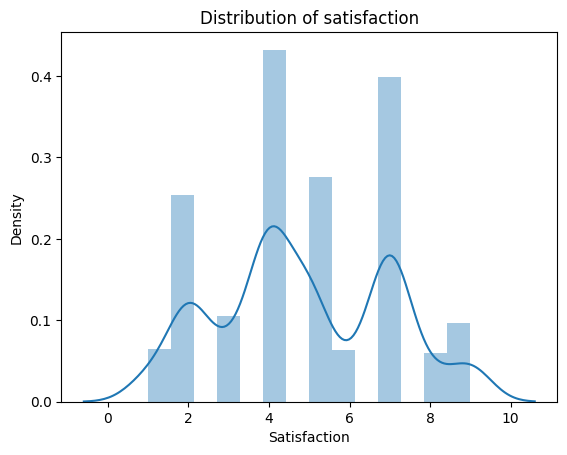

In [84]:
sns.distplot(data['Satisfaction'])
plt.title('Distribution of satisfaction')

Text(0.5, 1.0, 'Box Plot of Addiction Level')

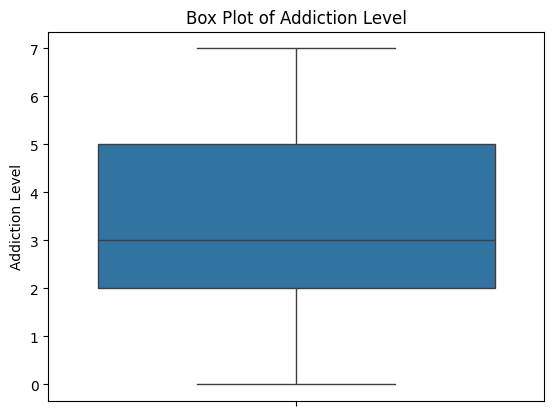

In [85]:
sns.boxplot(data['Addiction Level'])
plt.title('Box Plot of Addiction Level')

## CONCLUSION

WE CAN CONCLUDE THAT MAJORITY OF PEOPLE IN INDIA ARE WASTING TIME ON MAINLY TIKTOK OR INSTAGRAM

THESE ARE MOSTLY STUDENTS WHO ARE WASTING TIME ON SOCIAL MEDIA

AS THE SATISFACTION LEVEL INCREASES MORE THE PEOPLE SPEND TIME ON MEDIA AND GET ADDICTED TO IT.

IT ALSO TO BE NOTED THAT MANY PEOPLE HAVE HABIT TO BE ON SOCIAL MEEDIA.

# BIVARIATE ANALYSIS

# NUMERICAL-NUMERICAL

<Axes: xlabel='Satisfaction', ylabel='Addiction Level'>

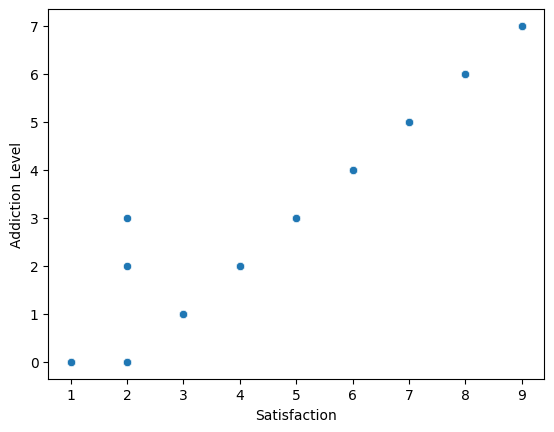

In [90]:
sns.scatterplot(data = data,x="Satisfaction",y="Addiction Level")

Addiction increases with satisfaction

# CATEGORICAL-NUMERICAL

<Axes: xlabel='Gender', ylabel='Total Time Spent'>

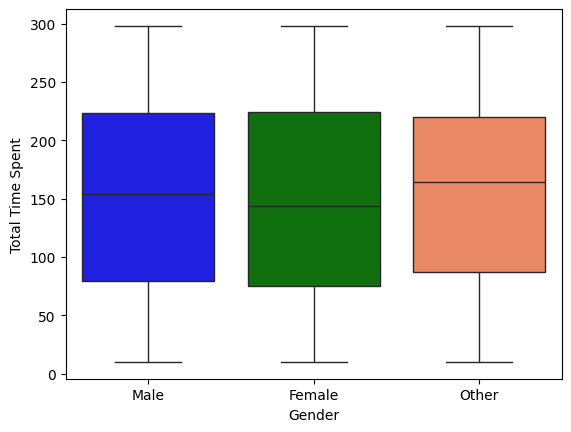

In [103]:
sns.boxplot(data=data, x="Gender", y="Total Time Spent",palette={'Male': 'blue', 'Female': 'green', 'Other': 'coral'})

female and male spend equally on social media

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pranks'),
  Text(1, 0, 'Vlogs'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, 'Jokes/Memes'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'ASMR'),
  Text(6, 0, 'Life Hacks'),
  Text(7, 0, 'Trends'),
  Text(8, 0, 'Comedy')])

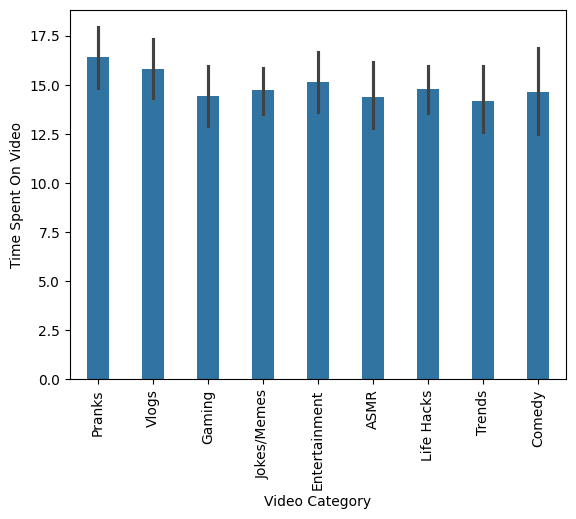

In [110]:
sns.barplot(data=data,x="Video Category",y="Time Spent On Video",width= 0.4)
plt.xticks(rotation=90)

time spend in watching prank videos is more

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pranks'),
  Text(1, 0, 'Vlogs'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, 'Jokes/Memes'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'ASMR'),
  Text(6, 0, 'Life Hacks'),
  Text(7, 0, 'Trends'),
  Text(8, 0, 'Comedy')])

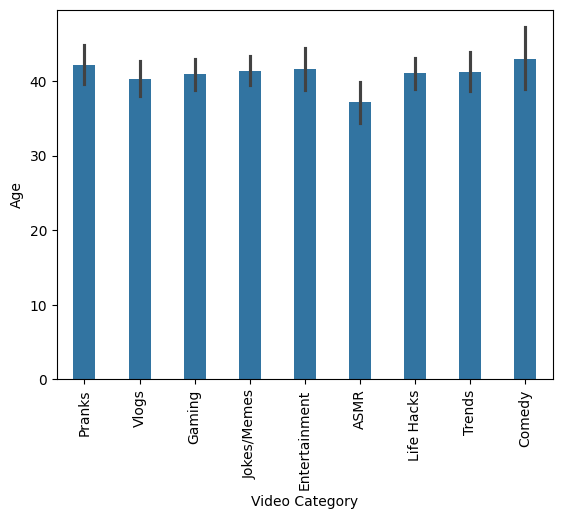

In [29]:
sns.barplot(data=data,x="Video Category",y="Age",width= 0.4)
plt.xticks(rotation=90)

<Axes: xlabel='Platform', ylabel='Total Time Spent'>

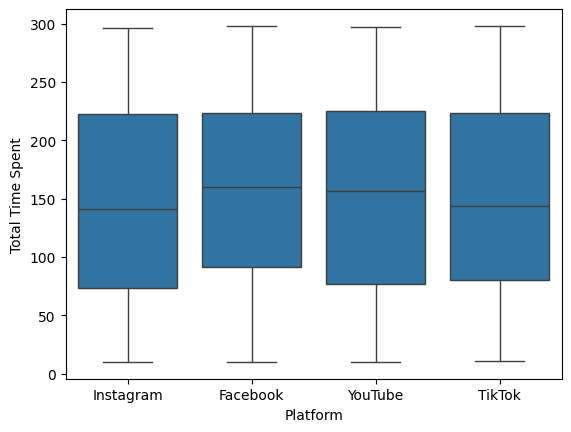

In [113]:
sns.boxplot(data=data, x="Platform", y="Total Time Spent")

People spend more time on instagram than any platform

Text(0.5, 1.0, 'Location Vs Time Spend')

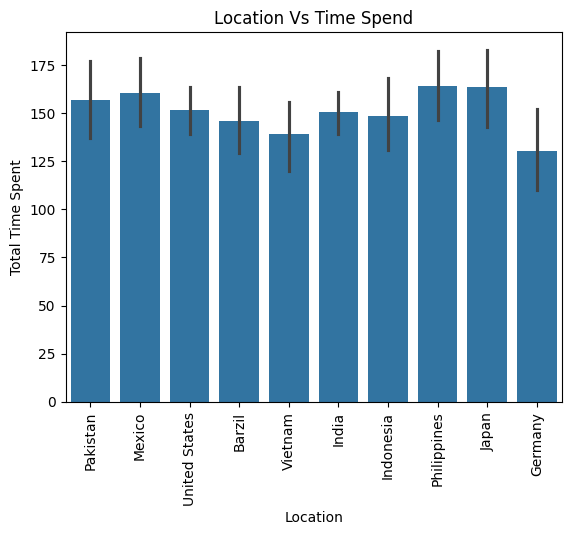

In [9]:
sns.barplot(data=data,x="Location",y="Total Time Spent")
plt.xticks(rotation=90)
plt.title("Location Vs Time Spend")

As we can see philippines people spend more time on social media

Text(0.5, 1.0, 'Profession Vs Time Spend')

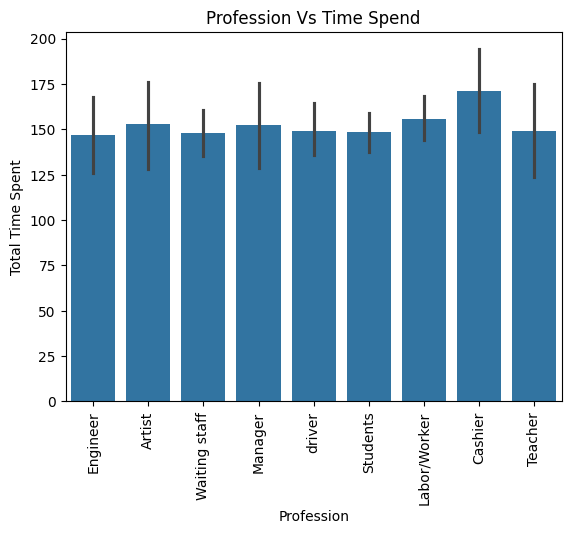

In [10]:
sns.barplot(data=data,x="Profession",y="Total Time Spent")
plt.xticks(rotation=90)
plt.title("Profession Vs Time Spend")

Cashier is spending more time on social platform

Text(0.5, 1.0, 'Video category Vs No.of videos watched')

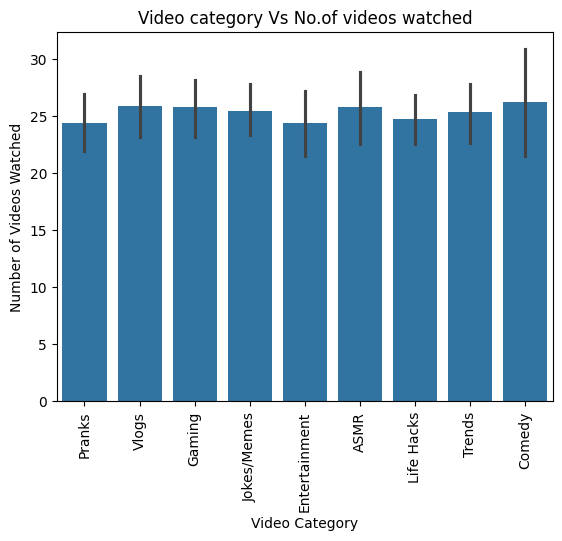

In [22]:
sns.barplot(data=data,x="Video Category",y="Number of Videos Watched")
plt.xticks(rotation=90)
plt.title("Video category Vs No.of videos watched")

Text(0.5, 1.0, 'Platform Vs Total time spent')

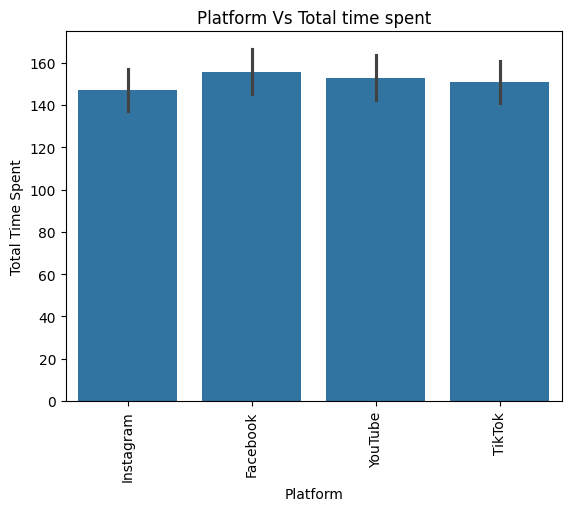

In [26]:
sns.barplot(data=data,x="Platform",y="Total Time Spent")
plt.xticks(rotation=90)
plt.title("Platform Vs Total time spent")

# CATEGORICAL-CATEGORICAL

<Axes: xlabel='Gender', ylabel='Addiction Level'>

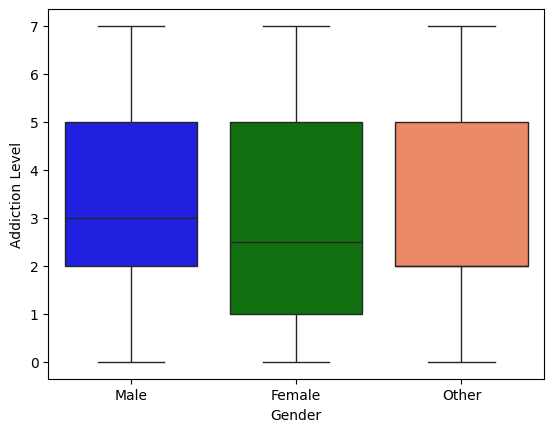

In [19]:
sns.boxplot(data=data, x="Gender", y="Addiction Level",palette = {'Male': 'blue', 'Female': 'green', 'Other': 'coral'})

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pranks'),
  Text(1, 0, 'Vlogs'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, 'Jokes/Memes'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'ASMR'),
  Text(6, 0, 'Life Hacks'),
  Text(7, 0, 'Trends'),
  Text(8, 0, 'Comedy')])

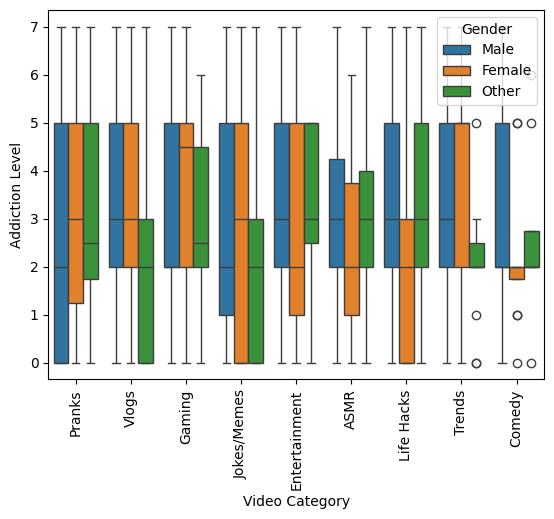

In [21]:
sns.boxplot(data=data, x="Video Category", y="Addiction Level", hue = "Gender")
plt.xticks(rotation= 90)

Most people like to watch comedy video

Trends videos provide more satisfaction to peoples

Text(0.5, 1.0, 'Location vs addiction level')

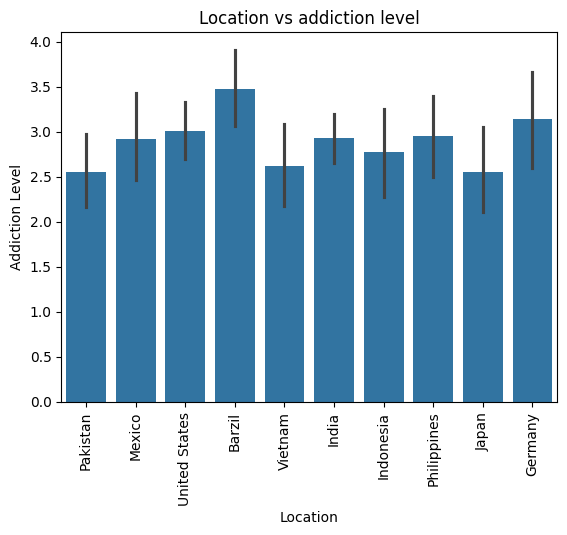

In [39]:
sns.barplot(data=data,x="Location",y="Addiction Level")
plt.xticks(rotation=90)
plt.title("Location vs addiction level")

brazil people are addicted to social media

Text(0.5, 1.0, 'Video category vs Satisfaction')

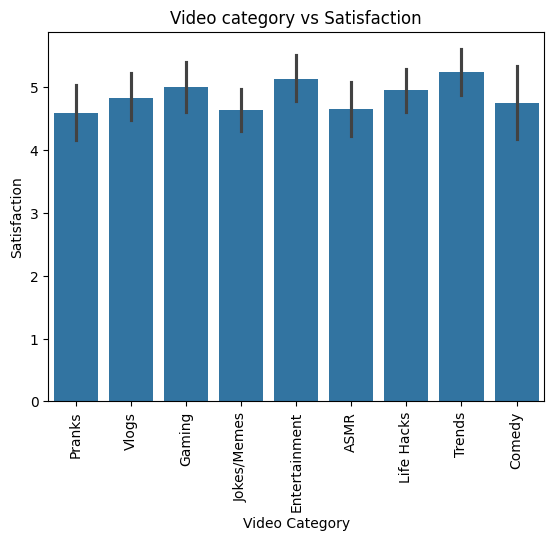

In [23]:
sns.barplot(data=data,x="Video Category",y="Satisfaction")
plt.xticks(rotation=90)
plt.title("Video category vs Satisfaction")

Text(0.5, 1.0, 'Video category Vs Addiction Level')

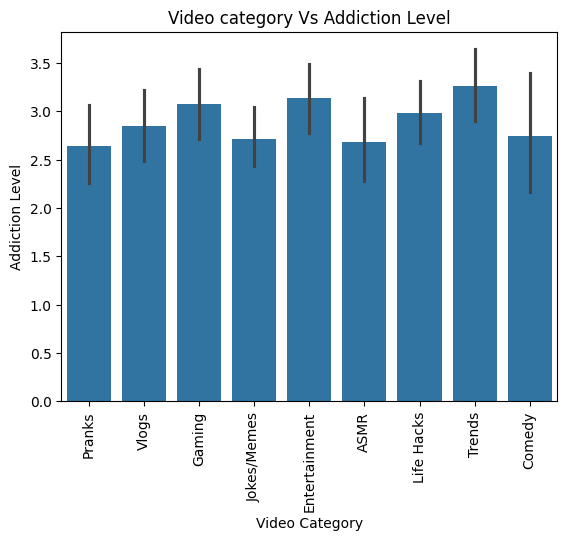

In [24]:
sns.barplot(data=data,x="Video Category",y="Addiction Level")
plt.xticks(rotation=90)
plt.title("Video category Vs Addiction Level")

As we can see people have more addiction towards trends videos

Text(0.5, 1.0, 'Platform Vs Addiction')

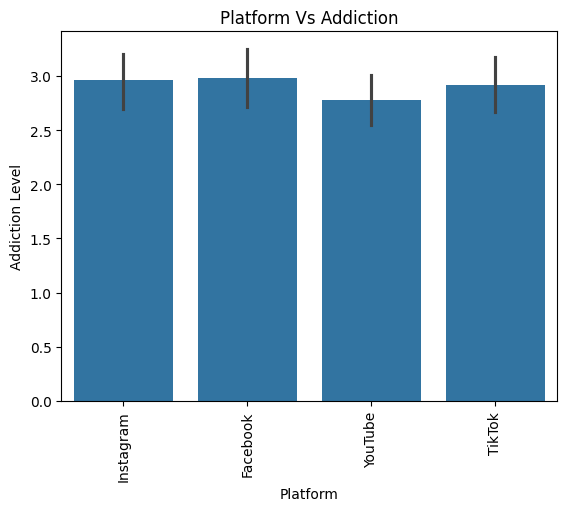

In [25]:
sns.barplot(data=data,x="Platform",y="Addiction Level")
plt.xticks(rotation=90)
plt.title("Platform Vs Addiction")

more people are addicted to facebook

Text(0.5, 1.0, 'Gender vs Platform')

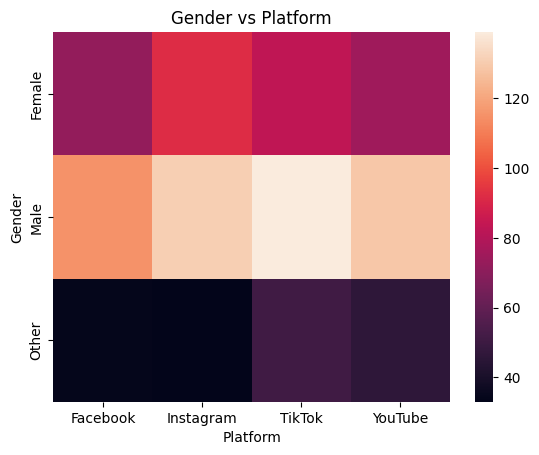

In [31]:
sns.heatmap(pd.crosstab(data['Gender'],data['Platform']))
plt.title("Gender vs Platform")

Text(0.5, 1.0, 'Platform vs Profession')

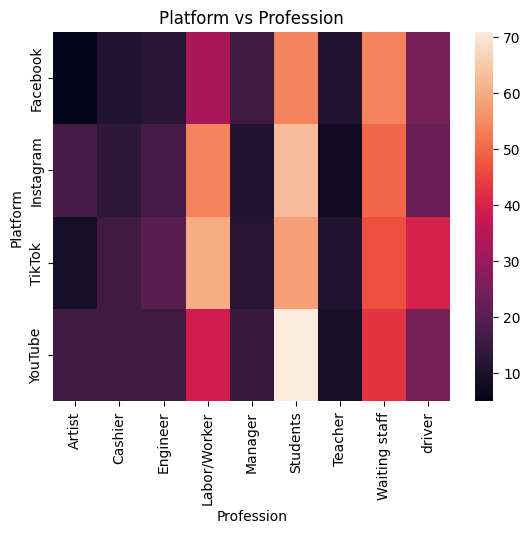

In [32]:
sns.heatmap(pd.crosstab(data['Platform'],data['Profession']))
plt.title("Platform vs Profession")

Text(0.5, 1.0, 'Profession vs video category')

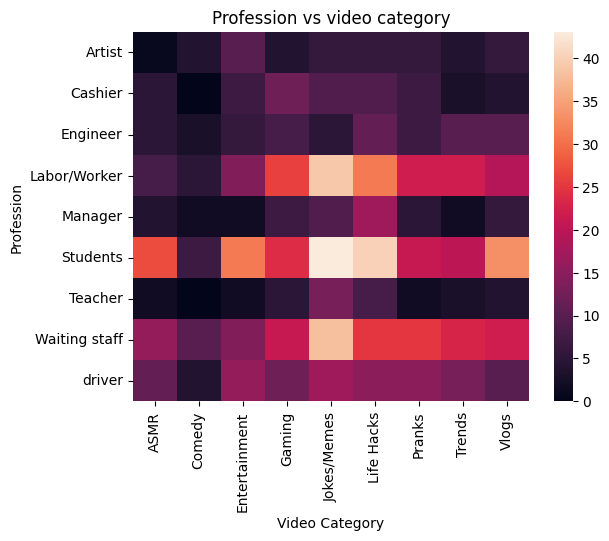

In [33]:
sns.heatmap(pd.crosstab(data['Profession'],data['Video Category']))
plt.title("Profession vs video category")

Text(0.5, 1.0, 'Gender vs video category')

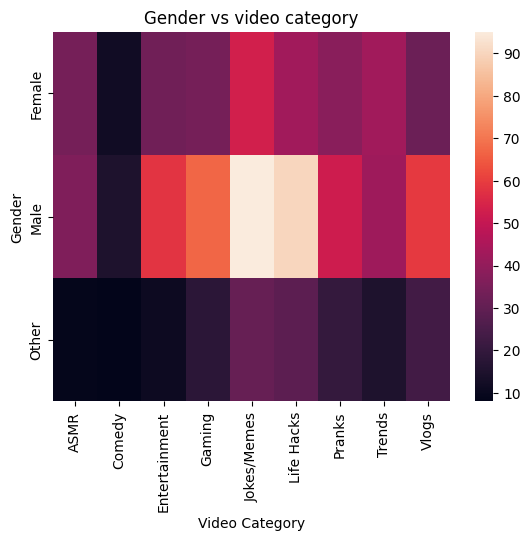

In [34]:
sns.heatmap(pd.crosstab(data['Gender'],data['Video Category']))
plt.title("Gender vs video category")

Text(0.5, 1.0, 'Location vs video category')

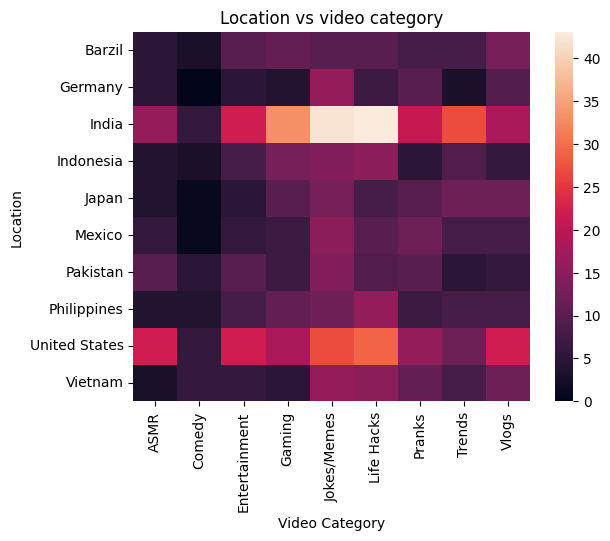

In [38]:
sns.heatmap(pd.crosstab(data['Location'],data['Video Category']))
plt.title("Location vs video category")

Text(0.5, 1.0, 'Location vs Platform')

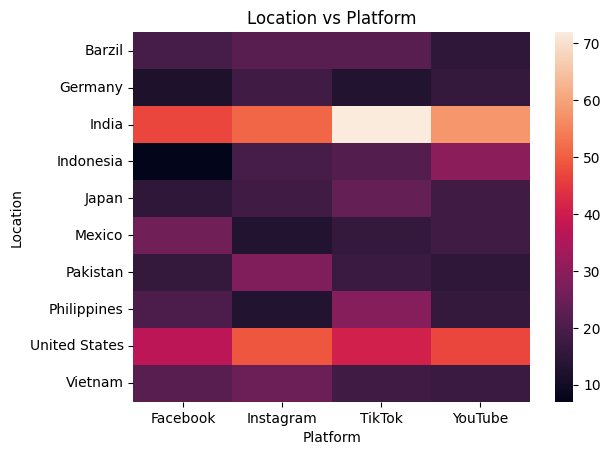

In [40]:
sns.heatmap(pd.crosstab(data['Location'],data['Platform']))
plt.title("Location vs Platform")

# CONCLUSION

IT IS NOTED THAT FEMALES ARE MORE ADDICTED TO SOCIAL MEDIA MAINLY ON INSTAGRAM/TIKTOK

MAJORITY PEOPLE IN INDIA LIKES TO WATCH JOKES/MEMES

BASICALLY LABOR/WORKER ARE ADDICTED TO JOKES, MEMES AND SOME CRINGE CONTENT WHILE EDUCATED PEOPLE ARE LESS ADDICTED TO THESE THINGS

AS THE AGE INCREASES PEOPLE GET MORE ADDICTED TOWARDS ENTERTAINMENT/COMEDY VIDEOS